Przygotowanie do zajęć:

Dane (były już używane):

iris,

adult, 

pima,

data_poleval,

international-airline-passengers.csv


Zainstalować keras:

w konsoli:
- pip install tensorflow
- pip install keras

sprawdzenei w Jupyterze czy jest ok:
- `from keras.models import Sequential
model = Sequential()`

Jeżeli ktoś instaluje inaczej to źródła:
- https://www.tensorflow.org/install/
- https://keras.io/#installation



Wywołać w jupyterze (żeby dane ściągnęły się na dysk):

from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# Plan dnia

1. Wielowarstwowa sieć neuronowa
2. Sieci konwolucyjne
 - zastosowanie do analizy obrazu w sklali szarości (2D)
 - zastosowanie do analizy obrazu w RGB (3D)

# Metoda spadku gradientu (gradient descent)

Mamy problem optymalizacyjny: szukamy parametru $\theta$, dla którego funkcja $f(\theta)$ przyjmuje wartość najmniejszą.

Algorytm:

Iteracyjnie poprawiamy wartość parametru według wzoru:

$$\theta_{new} = \theta_{old} - learning\_rate * \frac{df}{d\theta}$$

Dlaczego tak?
- gdy funkcja dla danego $\theta$ jest rosnąca, to pochodna jest dodatnia, więc przesumamy się w lewo,
- gdy funkcja dla danego $\theta$ jest malejąca, to pochodna jest ujemna, więc przesumamy się w prawo.

W skrócie: sprawdzamy w którą stronę funkcja maleje i tam się przesuwamy - tym dalej im nachylenie większe.

W przypadku wielowymiarowym - funkcja wielu zmiennych / $\theta$ jest wektorem - zamiast pochodnej mamy gradient: $\frac{df}{d\theta} = grad(f) = (\frac{df}{d\theta_1}, ..., \frac{df}{d\theta_k})$.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

def f(x):
    return(x**2 - 6*x + 12)
    
def grad_f(x):
    return(2*x - 6)


from IPython import display


def visualise_gradient_decsent(f=f,grad_f=grad_f,theta = -2, learning_rate=0.8, sec=3, x = np.linspace(-5,11,100)):

    """
    Funkcja wizualizujaca optymalizacje metoda spadku gradient.
    
    f - definicja funkcji, ktora chcemy zoptymalizowac
    grad_f - definicja jej pochodnej
    theta - punkt startowy
    learning_rate - wspolczynnik uczenia
    sec - dlugosc przerwy pomiedzy wyswietlaniem kolejnych elementow w sekundach
    x - przedzial na ktorym wizualizujemy dzialanie metody
    
    """
    
    y = f(x)
    
    for i in range(100):

        plt.figure(figsize=(10,10))
        plt.plot(x,y,c="blue")
        plt.scatter(theta,0,s=60)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.vlines(x=theta,ymin=0,ymax=f(theta))


        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        theta_new = theta - learning_rate*grad_f(theta)


        plt.arrow(theta, f(theta), 2, 2*grad_f(theta), head_width = 0.3,head_length = 0.3 )

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)


        plt.text(-1,40,"grad = %.3f" % grad_f(theta), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = " % (learning_rate,grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = %.2f" % (learning_rate,grad_f(theta), -learning_rate*grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)



        delta = theta_new - theta

        plt.text(min(theta,theta_new),3,"step = %.3f" % ( -learning_rate*grad_f(theta)), fontsize=20)
        plt.arrow(theta, 0, 0.9*delta, 0, head_width = 1,head_length = np.abs(0.1*delta),color="red" )

        display.clear_output(wait=True)
        display.display(plt.gcf())

        #plt.annotate('', xy=(theta, 10), xytext=(theta_new, 10),
        #                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
        #                   va='center', ha='center')
        theta = theta_new

        plt.vlines(x=theta,ymin=0,ymax=f(theta))
        #plt.show()

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

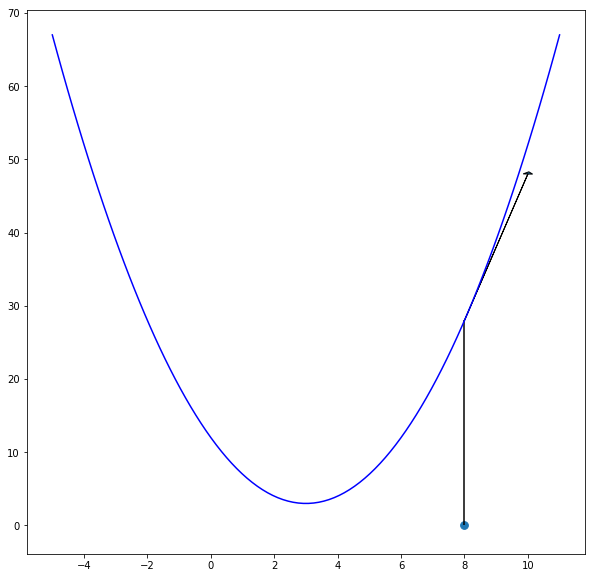

KeyboardInterrupt: 

In [3]:
visualise_gradient_decsent(learning_rate=0.1,sec=2) #dla lr=1 zapetla sie

In [ ]:
visualise_gradient_decsent(sec=1)

In [ ]:
visualise_gradient_decsent(learning_rate=1,sec=0.5)

In [20]:
def f(x):
    return(0.5*(x**4 - x**3 - 6*x**2 + 30) )

def grad_f(x):
    return(0.5*(4*x**3 - 3*x**2 - 12*x))

visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.02,x=np.linspace(-4,4,300),sec=0.3)

KeyboardInterrupt: 

In [ ]:
visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.1,x=np.linspace(-4,4,300),sec=0.3)

## Gradient decsent:
$$ Cost(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$\theta = \theta - learning\_rate * \frac{dCost}{d\theta}$$

Uczenie (optymalizacja) odbywa się w "epokach" - jedna epoka to aktualizaja wartosci parametru na podstawie całego zbioru obserwacji.

## Stochastic gradient decsent - SGD:

$$ Cost(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$

$$ \tilde{Cost}(\theta) = \frac{1}{r} \sum\limits_{i \in \{ i_1, ..., i_r \} } f(x_i,y_i,\theta),$$ $$ \ \ \text{gdzie} \ \ \{ i_1, ..., i_r \} - \text{losowy podzbiór obserwacji}$$
$$\theta = \theta - learning\_rate * \frac{d\tilde{Cost}}{d\theta_j}$$
i powtarzamy to wielokrotnie tak, żeby każda obserwacja została wykorzystana jeden raz - w praktyce mieszamy losowo kolejność obserwacji i bierzemy kolejne podzbiory - np. dla "batcha" wielkości 10, uczymy kolejno na obserwacjach od 1 do 10, od 11 do 20, itd.. Przejście po całych danych to jedna *epoka*.

SGD jest algorytmem uczenia sieci neuronowych wszelkiego rodzaju. W praktyce wykorzystuje się pewne modyfikacje tego algorytmu (np. "adam").

# Neuron

<img src="Grafika/neuron.jpg" width="500">

Źródło: https://cdn-images-1.medium.com/max/1600/0*l4ohhbrwQ5MGvmGc.jpg

<br>
<br>

<img src="Grafika/perceptron.gif" width="400">
Źródło: http://blog.zabarauskas.com/img/perceptron.gif

$\sigma(\cdot)$ - funkcja aktywacji

## $\sigma(x) = \frac{1}{1+\exp{(x)}}$

W praktyce popularne są trzy funkcje aktywacji:

- sigmoid
- tangens hiperboliczny
- RELU: $relu(x) = \max{(x,0)}$.

# Neuron jako klasyfikator:  Perceptron

In [3]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

class Perceptron(object):

    def __init__(self, eta=0.1, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.w_[0] = -50
        self.w_[1] = 10
        self.w_[2] = 1
        self.errors_ = []
        
        for i in range(self.epochs):
            
            plt.figure(figsize=(5,5))
        
            errors = 0
            for xi, target in zip(X, y):
                
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
                
            plt.scatter(X[:,0],X[:,1],c=y)
            plt.plot(np.linspace(4,7,100),-1 * (self.w_[0]+self.w_[1]*np.linspace(4,7,100))/self.w_[2])
            plt.title('Perceptron')
            plt.xlabel('sepal length [cm]')
            plt.ylabel('petal length [cm]')
            plt.xlim(4,7)
            plt.ylim(-1,6)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1)

            self.errors_.append(errors)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Wizualizacja procesu uczenia

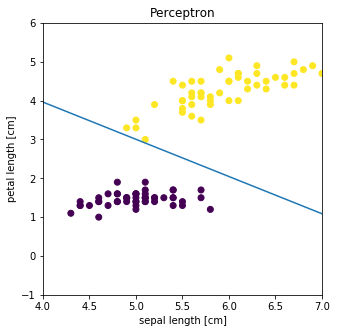

In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv('Dane/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

ppn = Perceptron(epochs=20, eta=0.15)
ppn.train(X, y)

# Wielowarstwowa sieć neuronowa

(*Multilayer perceptron*, *feedforward neural network*)


<img src="Grafika/MLP.jpg" width="700">
Źródło: https://www.intechopen.com/source/html/39071/media/f2.jpg


**Uwaga:** "Input layer" pomimo tego, że ma w nazwie słowo "warstwa", to tak naprawdę to nie jest żadna warstwa sieci... To są po prostu dane wejściowe... Przyjęło się literaturze nazywanie tego w ten sposób, co jest trcohę mylące :(


Sieci uczy sie metodą spadku gradientu (pewnymi wariantami tej metody). Uczenie wykorzystuje algorytm **propagacji wsteczej** (https://en.wikipedia.org/wiki/Backpropagation).

<br>

<br>

<br>

**Uwaga!** Sieci neuronowe absolutnie zawsze wymagają zestandaryzowanych danych! Niezależnie od tego czy wykorzystujemy regularyzację czy nie i niezależnie od typu sieci!

<br>

<br>

## Wizualizacja obszarów decyzyjnych w zależności od liczby neuronów

### (sieć jednowarstwowa)

<img src="Grafika/nn-from-scratch-hidden-layer-varying-655x1024.png" width="700">
Źródło: http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-hidden-layer-varying-655x1024.png

<br>

### Fakt matematyczny: jednowarstwową siecią możemy otrzymać dowolny kształt. 

Co z tego wynika? To, że (teoretycznie) zawsze wystarczy sieć jednowarstwowa (odpowiednio duża). W praktyce rzeczywiście z reguły wystarcza jedna warstwa, ale mimo wszystko zawsze warto sprawdzić czy 2 (lub 3) nie zadziałają przypadkiem lepiej. Przy czym jeżeli dla dwóch warstw jest gorzej, to nie ma sensu sprawdzać dla trzech.

# 1. Sieci wielowarstwowe - klasyfikacja na zwykłym zbiorze, testowanie warstw, dropoutów

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [27]:
dataset = np.loadtxt('Dane/pima-indians-diabetes.data', delimiter=",")


X = dataset[:,0:8]
Y = dataset[:,8]

print(X.shape)
print(np.mean(Y))

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####


models = [LogisticRegression(),
          DecisionTreeClassifier(),
          SVC(probability=True), 
          LinearDiscriminantAnalysis(), 
          QuadraticDiscriminantAnalysis(), 
          RandomForestClassifier()]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = np.round(y_pred)

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

(768, 8)
0.348958333333
Accuracy: 77.95% AUC:  0.828435319377
Accuracy: 71.26% AUC:  0.683105206656
Accuracy: 75.98% AUC:  0.834541062802
Accuracy: 77.17% AUC:  0.830716586151
Accuracy: 73.62% AUC:  0.785963499732
Accuracy: 78.35% AUC:  0.798778851315


In [6]:
from sklearn.neural_network import MLPClassifier

In [7]:
?MLPClassifier()

Jak widzimy MLP w sklearnie zatrzymuje uczenie na podstawie tego co się dzieje w treningowym! Na to sobie można pozwolić,
gdy pracujemy nad prostym problemem klasyfikacji, gdzie naszymi danymi jest tabelka, bo eksperymenty nie zajmują duzo czasu. Przy bardziej złożonych problemach, podchodzimy do tego inaczej!

In [34]:
model = MLPClassifier(10)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 77.56% AUC:  0.825818572195


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
X_train[:,3] = 10000 * X_train[:,3]
X_test[:,3] = 10000 * X_test[:,3]

In [19]:
model = MLPClassifier(10,alpha=0)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
predictions = np.round(y_pred)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 52.36% AUC:  0.526368760064


In [25]:
model.coefs_[0]

array([[  4.54595283e-01,   1.75407447e-01,  -4.02044288e-01,
          3.60263834e-01,   5.24885051e-01,   6.65025579e-02,
         -4.04789028e-01,   7.44468793e-02,   5.96705002e-02,
         -6.46739814e-02],
       [  1.31482854e-01,  -4.58709423e-01,  -2.85865679e-01,
          1.13619540e-01,  -3.23516997e-01,  -1.50441608e-01,
          2.17587871e-01,   5.44653295e-01,   3.60248817e-01,
         -2.87105108e-01],
       [ -4.31923949e-01,   2.57591797e-01,  -2.29107337e-01,
          4.87548458e-01,   4.12235670e-02,   4.61436148e-01,
          1.42106602e-01,  -5.66379314e-01,   5.63871163e-01,
          5.67433806e-01],
       [ -3.55492707e-01,  -8.98013834e-02,   4.73458810e-01,
         -2.92542794e-01,  -1.51411577e-01,  -4.12043150e-01,
         -1.47608375e-01,  -2.71315387e-01,   3.58972904e-01,
         -3.07022836e-02],
       [  1.73934975e-01,   3.25809963e-01,  -3.92603630e-01,
         -5.12407307e-01,  -5.59575863e-01,  -1.13870946e-02,
          5.36065263e-01

In [31]:
model.loss_curve_

[0.9831287051689318,
 0.97303233072170547,
 0.96333649489436601,
 0.95399767665916479,
 0.94444402038583242,
 0.93520384425652858,
 0.92621559691265243,
 0.91782281499780516,
 0.90921528761856096,
 0.90053155799484474,
 0.89252281641762099,
 0.8845049056744696,
 0.87692561569886263,
 0.86886203707546128,
 0.86179153258673469,
 0.85431961311180138,
 0.8470749084324386,
 0.83995875275746945,
 0.83349200763348796,
 0.82657471176280362,
 0.82015529347100902,
 0.81357003424044794,
 0.80726506753792027,
 0.80117266527281428,
 0.79543674805632758,
 0.78933888526097273,
 0.78367341104674904,
 0.77794039888272137,
 0.77243132336393439,
 0.76715515025585868,
 0.76189481442894291,
 0.75673219753440102,
 0.75163654970307447,
 0.74681628227663954,
 0.74199293241155972,
 0.73750526569483166,
 0.73312446553632515,
 0.72860412448163636,
 0.72435553862279933,
 0.72004884766984123,
 0.71611443650570561,
 0.71204837828169676,
 0.70837779039343118,
 0.70437336982767929,
 0.70093489230692885,
 0.6972136220

Zachowanie sieci w zależności od liczby neuronów:

Ustawiamy `max_iter=10000,tol=0` żeby zaobserwować co sie dzieje.

In [37]:
for h1_dim in [3,5,10,15,20,30,50,75,100,125,150,175,200,250,300,350,400,500]:

    model = MLPClassifier((h1_dim,),activation="tanh",max_iter=10000,tol=0)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = np.round(y_pred)

    accuracy_test = accuracy_score(y_test, predictions)
    #print(h1_dim, "Accuracy Test: %.2f%%" % (accuracy_test * 100.0), )
    
    predictions = model.predict(X_train)
    
    accuracy_train = accuracy_score(y_train, predictions)
    print(h1_dim, "Accuracy test: %.2f%%" % (accuracy_test * 100.0), 
          "Train: %.2f%%" % (accuracy_train * 100.0), 
          "Iter: ", model.n_iter_)

3 Accuracy test: 76.77% Train: 78.99% Iter:  857
5 Accuracy test: 73.23% Train: 79.38% Iter:  1879
10 Accuracy test: 74.41% Train: 88.13% Iter:  2979
15 Accuracy test: 70.87% Train: 90.66% Iter:  2930
20 Accuracy test: 72.05% Train: 95.72% Iter:  3698
30 Accuracy test: 71.26% Train: 100.00% Iter:  7450
50 Accuracy test: 72.83% Train: 100.00% Iter:  3146


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


75 Accuracy test: 75.59% Train: 87.94% Iter:  870
100 Accuracy test: 73.23% Train: 93.00% Iter:  1495
125 Accuracy test: 75.59% Train: 83.85% Iter:  616
150 Accuracy test: 75.59% Train: 81.32% Iter:  392
175 Accuracy test: 76.77% Train: 80.74% Iter:  339
200 Accuracy test: 77.17% Train: 80.16% Iter:  338
250 Accuracy test: 77.17% Train: 80.54% Iter:  329
300 Accuracy test: 78.35% Train: 78.40% Iter:  42
350 Accuracy test: 78.74% Train: 78.02% Iter:  19
400 Accuracy test: 78.74% Train: 78.40% Iter:  26
500 Accuracy test: 77.95% Train: 77.43% Iter:  29


Widzimy przeuczenie w niektórych przypadkach - tam gdzie jest duża różnica między dopasowaniem na zbiorze treningowym a testowym.

Teraz już poprawnie - sieć zatrzyma się, gdy się stabilizuje:

In [39]:
for h1_dim in [3,5,10,15,20,30,50,75,100,150,200,300,400,500]:

    model = MLPClassifier((h1_dim,),activation="tanh",max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = np.round(y_pred)

    accuracy_test = accuracy_score(y_test, predictions)
    #print(h1_dim, "Accuracy Test: %.2f%%" % (accuracy_test * 100.0), )
    
    predictions = model.predict(X_train)
    
    accuracy_train = accuracy_score(y_train, predictions)
    print(h1_dim, "Accuracy Test: %.2f%%" % (accuracy_test * 100.0), 
          "Train: %.2f%%" % (accuracy_train * 100.0),
         "Iter: ", model.n_iter_)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


3 Accuracy Test: 71.65% Train: 74.32% Iter:  200
5 Accuracy Test: 77.56% Train: 78.02% Iter:  200
10 Accuracy Test: 75.59% Train: 78.60% Iter:  200
15 Accuracy Test: 77.56% Train: 78.99% Iter:  200
20 Accuracy Test: 76.38% Train: 78.79% Iter:  200
30 Accuracy Test: 76.77% Train: 80.35% Iter:  200
50 Accuracy Test: 77.95% Train: 79.18% Iter:  200
75 Accuracy Test: 77.17% Train: 79.57% Iter:  200
100 Accuracy Test: 75.98% Train: 78.79% Iter:  200
150 Accuracy Test: 78.74% Train: 78.40% Iter:  39
200 Accuracy Test: 78.35% Train: 77.82% Iter:  41
300 Accuracy Test: 79.13% Train: 77.82% Iter:  22
400 Accuracy Test: 78.35% Train: 78.21% Iter:  29
500 Accuracy Test: 77.95% Train: 78.40% Iter:  25


Zauważmy, że najmniejsza sieć (5 neuronów) daje praktycznie takie same wyniki jak większe sieci -> jeżeli różne sieci działają tak samo, to oczywiście bierzemy mniejszą (prostszy model).

In [45]:
import itertools

In [46]:
for h1_dim,h2_dim in itertools.product([3,5,10,25,30,50,75,100,150,200,400,500], [10,20,30,50,100]):

    model = MLPClassifier((h1_dim,h2_dim),activation="tanh",max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = np.round(y_pred)

    accuracy_test = accuracy_score(y_test, predictions)
    #print(h1_dim, "Accuracy Test: %.2f%%" % (accuracy_test * 100.0), )
    
    predictions = model.predict(X_train)
   
    accuracy_train = accuracy_score(y_train, predictions)
    print(h1_dim, h2_dim, "Accuracy test: %.2f%%" % (accuracy_test * 100.0), "Train: %.2f%%" % (accuracy_train * 100.0))

3 10 Accuracy test: 75.59% Train: 78.60%
3 20 Accuracy test: 74.41% Train: 77.63%
3 30 Accuracy test: 77.56% Train: 78.99%
3 50 Accuracy test: 77.95% Train: 78.99%
3 100 Accuracy test: 77.17% Train: 78.40%


/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


5 10 Accuracy test: 75.59% Train: 81.13%
5 20 Accuracy test: 77.95% Train: 79.38%
5 30 Accuracy test: 78.35% Train: 78.99%
5 50 Accuracy test: 75.59% Train: 79.96%
5 100 Accuracy test: 76.77% Train: 78.60%
10 10 Accuracy test: 73.62% Train: 82.49%
10 20 Accuracy test: 75.98% Train: 79.18%
10 30 Accuracy test: 74.80% Train: 82.10%
10 50 Accuracy test: 75.20% Train: 80.16%
10 100 Accuracy test: 77.17% Train: 80.35%
25 10 Accuracy test: 72.05% Train: 86.19%
25 20 Accuracy test: 75.98% Train: 86.58%
25 30 Accuracy test: 72.83% Train: 88.52%
25 50 Accuracy test: 70.87% Train: 89.88%
25 100 Accuracy test: 73.23% Train: 86.19%
30 10 Accuracy test: 74.41% Train: 85.02%
30 20 Accuracy test: 74.41% Train: 87.94%
30 30 Accuracy test: 71.26% Train: 91.44%
30 50 Accuracy test: 75.98% Train: 86.58%
30 100 Accuracy test: 73.23% Train: 86.38%
50 10 Accuracy test: 74.02% Train: 86.77%
50 20 Accuracy test: 73.23% Train: 91.63%
50 30 Accuracy test: 76.38% Train: 92.41%
50 50 Accuracy test: 75.98% Train: 

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:565: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


200 30 Accuracy test: 72.44% Train: 85.41%
200 50 Accuracy test: 76.77% Train: 78.79%
200 100 Accuracy test: 77.17% Train: 78.60%
400 10 Accuracy test: 72.83% Train: 90.86%
400 20 Accuracy test: 77.95% Train: 78.79%
400 30 Accuracy test: 74.41% Train: 98.25%
400 50 Accuracy test: 70.47% Train: 99.81%
400 100 Accuracy test: 77.95% Train: 78.60%
500 10 Accuracy test: 71.26% Train: 90.47%
500 20 Accuracy test: 78.35% Train: 78.60%
500 30 Accuracy test: 77.56% Train: 78.99%
500 50 Accuracy test: 77.56% Train: 78.40%
500 100 Accuracy test: 77.56% Train: 78.60%


Widzimy przeuczenie w części sieci.

Dodanie warstwy nie poprawiło wyników, więc nie ma sensu próbować dodawania kolejnych.

Zatem na podstawie powyższych testów, przyjęlibyśmy, że najlepsza sieć to sieć jednowarstwowa z 5 neuronami.

### Powyższe podejście do zatrzymywania uczenia jest akceptowalne tylko w prostych problemach. Ogólnie należy uczyć inaczej: early stopping!

In [ ]:
model = MLPClassifier((5,),activation="tanh",early_stopping=True,validation_fraction=0.3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


accuracy_test = accuracy_score(y_test, predictions)
print("Accuracy Test: %.2f%%" % (accuracy_test * 100.0), )
    

Na tych danych otrzymamy gorszy wynik, bo zbiór jest bardzo mały.

Uwaga: trzeba uważać na to, żeby zbiór walidacyjny był wystarczająco duży, żeby o końcu uczenia nie zadecydował czynnik losowy! Jeżeli nie mamy zbyt dużo danych to niestety mamy problem... Sieci neuronowe stosuje się do raczej dużych zbiorów danych.

In [121]:
# Wczytaj dane treningowe i testowe

import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()



dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

print(X_train.shape)
X_test.shape

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


(30162, 41)


(15060, 41)

Sprawdźmy wyniki na surowych danych.

In [41]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [45]:
params = {"hidden_layer_sizes": [(5),(10),(15),(30),(50),(100),(250),(500),(750),(1000),(2000),(3000)]}

nnet = MLPClassifier(activation="tanh",alpha=0,early_stopping=True,validation_fraction=0.15)
gs = GridSearchCV(cv=ShuffleSplit(n_splits=1,test_size=0.1),error_score="accuracy",estimator=nnet,param_grid=params)
gs.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=None, test_size=0.1, train_size=None),
       error_score='accuracy',
       estimator=MLPClassifier(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.15,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [5, 10, 15, 30, 50, 100, 250, 500, 750, 1000, 2000, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
gs.grid_scores_

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.80046, std: 0.00000, params: {'hidden_layer_sizes': 5},
 mean: 0.83129, std: 0.00000, params: {'hidden_layer_sizes': 10},
 mean: 0.80610, std: 0.00000, params: {'hidden_layer_sizes': 15},
 mean: 0.83494, std: 0.00000, params: {'hidden_layer_sizes': 30},
 mean: 0.83195, std: 0.00000, params: {'hidden_layer_sizes': 50},
 mean: 0.82433, std: 0.00000, params: {'hidden_layer_sizes': 100},
 mean: 0.83328, std: 0.00000, params: {'hidden_layer_sizes': 250},
 mean: 0.83394, std: 0.00000, params: {'hidden_layer_sizes': 500},
 mean: 0.83460, std: 0.00000, params: {'hidden_layer_sizes': 750},
 mean: 0.83858, std: 0.00000, params: {'hidden_layer_sizes': 1000},
 mean: 0.81505, std: 0.00000, params: {'hidden_layer_sizes': 2000},
 mean: 0.82996, std: 0.00000, params: {'hidden_layer_sizes': 3000}]

In [46]:
accuracy_score(gs.best_estimator_.predict(X_test),y_test)

0.83061088977423636

### A teraz tak jak się powinno - na wystandaryzowanych.

In [122]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [123]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
?MLPClassifier

In [49]:
params = {"hidden_layer_sizes": [(5),(10),(15),(30),(50),(100),(250),(500),(750),(1000),(2000),(3000)]}

nnet = MLPClassifier(activation="tanh",alpha=0,early_stopping=True,validation_fraction=0.15)
gs = GridSearchCV(cv=ShuffleSplit(n_splits=1,test_size=0.15),error_score="accuracy",estimator=nnet,param_grid=params)
gs.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=None, test_size=0.15, train_size=None),
       error_score='accuracy',
       estimator=MLPClassifier(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.15,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [5, 10, 15, 30, 50, 100, 250, 500, 750, 1000, 2000, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
gs.grid_scores_

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.84331, std: 0.00000, params: {'hidden_layer_sizes': 5},
 mean: 0.84199, std: 0.00000, params: {'hidden_layer_sizes': 10},
 mean: 0.84707, std: 0.00000, params: {'hidden_layer_sizes': 15},
 mean: 0.84464, std: 0.00000, params: {'hidden_layer_sizes': 30},
 mean: 0.84641, std: 0.00000, params: {'hidden_layer_sizes': 50},
 mean: 0.84796, std: 0.00000, params: {'hidden_layer_sizes': 100},
 mean: 0.84641, std: 0.00000, params: {'hidden_layer_sizes': 250},
 mean: 0.84552, std: 0.00000, params: {'hidden_layer_sizes': 500},
 mean: 0.84354, std: 0.00000, params: {'hidden_layer_sizes': 750},
 mean: 0.84552, std: 0.00000, params: {'hidden_layer_sizes': 1000},
 mean: 0.84685, std: 0.00000, params: {'hidden_layer_sizes': 2000},
 mean: 0.84729, std: 0.00000, params: {'hidden_layer_sizes': 3000}]

In [51]:
accuracy_score(gs.best_estimator_.predict(X_test),y_test)

0.84714475431606906

Widzimy, że najlepiej zadziałały sieci o liczbie neuronów podobnej do liczby zmiennych (42).

**Uwaga:** im więcej neuronów, tym więcej parametrów -> tym więcej danych potrzeba, żeby je dobrze nauczyć.

Dlatego trzeba badać sieci na dużych danych - bo jeśli badamy na małych danych to większe sieci, stoją na przegranej pozycji, pomimo tego, że gdyby danych było więcej, to być może byłyby obiektywnie lepsze.

Dla sieci o domyślnych parametrach:

In [55]:
params = {"hidden_layer_sizes": [(5),(10),(15),(30),(50),(100),(250),(500),(750),(1000),(2000),(3000)]}

nnet = MLPClassifier(early_stopping=True,validation_fraction=0.15)
gs = GridSearchCV(cv=ShuffleSplit(n_splits=1,test_size=0.15),error_score="accuracy",estimator=nnet,param_grid=params)
gs.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=None, test_size=0.15, train_size=None),
       error_score='accuracy',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.15,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [5, 10, 15, 30, 50, 100, 250, 500, 750, 1000, 2000, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [56]:
gs.grid_scores_

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.84486, std: 0.00000, params: {'hidden_layer_sizes': 5},
 mean: 0.83890, std: 0.00000, params: {'hidden_layer_sizes': 10},
 mean: 0.83669, std: 0.00000, params: {'hidden_layer_sizes': 15},
 mean: 0.84376, std: 0.00000, params: {'hidden_layer_sizes': 30},
 mean: 0.84552, std: 0.00000, params: {'hidden_layer_sizes': 50},
 mean: 0.84906, std: 0.00000, params: {'hidden_layer_sizes': 100},
 mean: 0.84530, std: 0.00000, params: {'hidden_layer_sizes': 250},
 mean: 0.84597, std: 0.00000, params: {'hidden_layer_sizes': 500},
 mean: 0.84552, std: 0.00000, params: {'hidden_layer_sizes': 750},
 mean: 0.84309, std: 0.00000, params: {'hidden_layer_sizes': 1000},
 mean: 0.84641, std: 0.00000, params: {'hidden_layer_sizes': 2000},
 mean: 0.84641, std: 0.00000, params: {'hidden_layer_sizes': 3000}]

In [57]:
accuracy_score(gs.best_estimator_.predict(X_test),y_test)

0.84840637450199208

In [53]:
from pprint import pprint

params = {"hidden_layer_sizes": [(10,10), (50,10),(50,50),(100,10),(100,50),(100,100),(500,100)]}

nnet = MLPClassifier(activation="tanh",early_stopping=True,validation_fraction=0.15)
gs = GridSearchCV(cv=ShuffleSplit(n_splits=1,test_size=0.1),error_score="accuracy",estimator=nnet,param_grid=params)
gs.fit(X_train,y_train)
pprint(gs.grid_scores_)
accuracy_score(gs.best_estimator_.predict(X_test),y_test)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85250, std: 0.00000, params: {'hidden_layer_sizes': (10, 10)},
 mean: 0.84919, std: 0.00000, params: {'hidden_layer_sizes': (50, 10)},
 mean: 0.84853, std: 0.00000, params: {'hidden_layer_sizes': (50, 50)},
 mean: 0.85217, std: 0.00000, params: {'hidden_layer_sizes': (100, 10)},
 mean: 0.84388, std: 0.00000, params: {'hidden_layer_sizes': (100, 50)},
 mean: 0.85549, std: 0.00000, params: {'hidden_layer_sizes': (100, 100)},
 mean: 0.85648, std: 0.00000, params: {'hidden_layer_sizes': (500, 100)}]


0.84355909694555109

Czyli wyniki są mniej wiecej takie same.

In [61]:
model_small = MLPClassifier(10)
model_big = MLPClassifier(1000)

small_train, small_test, big_train, big_test = [],[],[],[]

ns = [100,200,300,400,500,750,1000,2500,5000,10000,15000,20000,25000,X_train.shape[0]]

for n in ns:
    model_small.fit(X_train[:n],y_train[:n])
    model_big.fit(X_train[:n],y_train[:n])
    small_train.append(accuracy_score(y_train[:n],model_small.predict(X_train[:n])))
    small_test.append(accuracy_score(y_test,model_small.predict(X_test)))
    big_train.append(accuracy_score(y_train[:n],model_big.predict(X_train[:n])))
    big_test.append(accuracy_score(y_test,model_big.predict(X_test)))

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


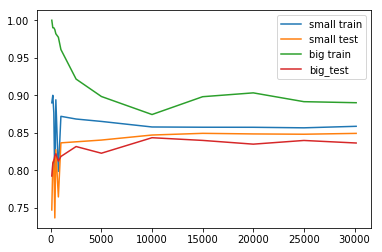

In [67]:
plt.plot(ns, small_train)
plt.plot(ns, small_test)
plt.plot(ns, big_train)
plt.plot(ns, big_test)
plt.legend(["small train","small test","big train","big_test"])
plt.show()

# Uwaga

W różnych materiałach możemy sie spotkać z takim kodem. 

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

scores = model.evaluate(X_test, y_test)

<br>

<br>

<br>

<br>

<br>

<br>

<br>

Takie coś nie ma prawa pojawić się w poprawnym modelowaniu, bo:

1. W czasie uczenia wykorzystujemy zbiór testowy (jako walidacyjny) - nie daje to rzetelnej oceny jakości modelu.
2. Liczba epok jest ustalona.


<br>

<br>

<br>


## Keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [81]:
model = Sequential()
model.add(Dense(10,input_shape=(X_train.shape[1],)))
model.add(Dense(10))
model.add(Dense(1))

In [82]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                420       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [84]:
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.fit(X_train,y_train, batch_size=8, validation_split=0.15, callbacks=[early_stopping], epochs=100)

Train on 25637 samples, validate on 4525 samples
Epoch 1/100
25637/25637 [==============================] - 10s 398us/step - loss: 2.8618 - acc: 0.3412 - val_loss: 2.1394 - val_acc: 0.3615

In [85]:
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 1s 43us/step


[0.38933746918422452, 0.81792828688425212]

In [117]:
from keras.regularizers import l2

In [124]:
model = Sequential()
model.add(Dense(10,input_shape=(X_train.shape[1],),kernel_regularizer=l2(0.01)))
model.add(Dense(10,kernel_regularizer=l2(0.01)))
model.add(Dense(1,kernel_regularizer=l2(0.01)))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.fit(X_train,y_train, batch_size=8, validation_split=0.15, callbacks=[early_stopping], epochs=100)

model.evaluate(X_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 10)                420       
_________________________________________________________________
dense_50 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________
Train on 25637 samples, validate on 4525 samples
Epoch 1/100
25637/25637 [==============================] - 13s 488us/step - loss: 2.9438 - acc: 0.2249 - val_loss: 2.5920 - val_acc: 0.1987

[0.43884746913574291, 0.79840637450199203]

## Regularyzacja dropout


<img src="Grafika/dropout.jpeg" width="550">


In [125]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(10,input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.fit(X_train,y_train, batch_size=8, validation_split=0.15, callbacks=[early_stopping], epochs=100)

model.evaluate(X_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 10)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________
Train on 25637 samples, validate on 4525 samples
Epoch 1/100
25637/25637 [==============================] - 13s 513us/step - loss: 4.4553 - acc:

[0.38341700435080533, 0.81241699865614747]

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(50,input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(20))
model.add(Dropout(0.5))

model.add(Dense(1,activations="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
model.fit(X_train,y_train, batch_size=8, validation_split=0.15, callbacks=[early_stopping], epochs=100)

model.evaluate(X_test,y_test)

### Cwiczenie

Zaimplementuj funkcję `construct_mlp(layer_sizes, input_shape, add_dropout, dropout_rate, compile=False)`, która zwraca kerasowy model, gdzie:
- `layer_sizes` - krotka rozmiarow kolejnych warstw dense,
- `input_shape` - ksztalt danych wejsciowych
- `add_dropout` - jeśli `True`, to po każdej warstwie dense w sieci umieszcamy dropout
- `dropout_rate` - stopien ewentualnego dropoutu
- `compile` - jeśli `True`, to zwracamy skompilowany model

## Functional API (interfejs funkcyjny konstrukcji modeli)

In [2]:
from keras.models import Model
from keras.layers import Input

In [89]:
input_layer = Input(shape=(X_train.shape[1],))
l1 = Dense(20)(input_layer)
l2 = Dense(20)(l1)
output_layer = Dense(1,activation="sigmoid")(l2)

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                420       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.fit(X_train,y_train,validation_split=0.15,callbacks=[early_stopping],epochs=100)

Train on 25637 samples, validate on 4525 samples
Epoch 1/100
25637/25637 [==============================] - 3s 124us/step - loss: 0.3683 - acc: 0.8172 - val_loss: 0.3797 - val_acc: 0.8208

In [95]:
model.evaluate(X_test,y_test)

15060/15060 [==============================] - 1s 51us/step


[0.37703243252607299, 0.82529880474921402]

## Klasyfikacja maili

In [3]:
from sklearn.datasets import fetch_20newsgroups
import nltk
import string
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import re
import numpy as np

In [17]:
newsgroups = fetch_20newsgroups(subset='train')

X = newsgroups.data
y = newsgroups.target

X = [X[j] for j in range(len(y)) if j in np.array([i for i in range(len(y)) if y[i] in [0,1,7]])]
y = [y[j] for j in range(len(y)) if j in np.array([i for i in range(len(y)) if y[i] in [0,1,7]])]

In [19]:
len(X),y[:10]

(1658, [7, 1, 0, 1, 7, 0, 1, 7, 7, 7])

In [21]:
y = np_utils.to_categorical(y)
y[:10]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

In [22]:
y[:,2] = y[:,-1]
y[:10]

array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

In [23]:
y = y[:,:3]
y[:5]

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]], dtype=float32)

In [44]:
y.mean(0)

array([ 0.28950542,  0.35223159,  0.35826296], dtype=float32)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=500)

In [25]:
def extract_content(mail):    
    # wyciagniecie tresci maila   
    return mail[mail.find("\n\n"):]

def extract_subject(mail):
    return re.findall(r'Subject:(.+)',mail)[0]

In [26]:
def stem_helper(word,stemmer):
    try:
        y = stemmer.stem(word)
    except:
        y = word
    return y



def clean_text(x, stemmer = nltk.PorterStemmer()):   
    """
    x - jeden mail
    """    
 
    #tokenizacja - rozbicie na liste tokenow
    x_t = nltk.word_tokenize(x)    
    # usuwanie znakow interpunkcyjnych
    translator = str.maketrans('', '', string.punctuation)
    x_t = [word.translate(translator) for word in x_t]    
    # zamina liter male
    x_t = [word.lower() for word in x_t]    
    # usuwanie zbednych tokenow
    x_t = [w for w in x_t if w not in nltk.corpus.stopwords.words("english")+["nt"]]    
    # stemming
    x_t = [stem_helper(word,stemmer) for word in x_t]    
    # sklejenie do napisu
    x_new = ' '.join(x_t)    
    return x_new


In [27]:
from sklearn.base import TransformerMixin

class TextCleaner(TransformerMixin):
    def __init__(self):
        pass
        
    def transform(self, X):
        return np.array([clean_text(x) for x in X])
    
    def fit(self, X):
        return self

In [28]:
X_train_contents = np.array([extract_content(x) for x in X_train])
X_train_subjects = np.array([extract_subject(x) for x in X_train])

In [29]:
X_test_contents = np.array([extract_content(x) for x in X_test])
X_test_subjects = np.array([extract_subject(x) for x in X_test])

In [30]:
X_train_all = np.array([x+y for x,y in zip(X_train_subjects,X_train_contents)])

In [31]:
X_train_contents = TextCleaner().fit_transform(X_train_contents)
X_train_subjects = TextCleaner().fit_transform(X_train_subjects)
X_test_contents = TextCleaner().fit_transform(X_test_contents)
X_test_subjects = TextCleaner().fit_transform(X_test_subjects)

In [32]:
pipe = make_pipeline(CountVectorizer())

In [34]:
pipe.fit(X_train_all)

'Fri Aug 24 15:26:18 2018'

In [35]:
X_train_contents = pipe.transform(X_train_contents)
X_train_subjects = pipe.transform(X_train_subjects)
X_test_contents = pipe.transform(X_test_contents)
X_test_subjects = pipe.transform(X_test_subjects)

In [36]:
X_train_subjects.shape

(1158, 50)

In [37]:
from keras.layers import concatenate

In [64]:
input_subject = Input(shape=(X_train_subjects.shape[1],))
input_content = Input(shape=(X_train_contents.shape[1],))

dens_subject = Dense(50)(input_subject)
dens_subject = Dense(50)(dens_subject)
dens_content = Dense(50)(input_content)
dens_content = Dense(50)(dens_content)
dens_content = Dense(20)(dens_content)
merge = concatenate([dens_subject,dens_content])

d = Dense(50)(merge)
d = Dense(40)(d)
output = Dense(y.shape[1],activation="softmax")(d)

model = Model(inputs=[input_subject,input_content],output=output)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


In [65]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 50)           0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           (None, 50)           0                                            
__________________________________________________________________________________________________
dense_51 (Dense)                (None, 50)           2550        input_16[0][0]                   
__________________________________________________________________________________________________
dense_49 (Dense)                (None, 50)           2550        input_15[0][0]                   
__________________________________________________________________________________________________
dense_52 (

In [66]:
from keras.callbacks import ModelCheckpoint

In [67]:
model.fit([X_train_subjects,X_train_contents],y_train,epochs=20,validation_split=0.2,callbacks=[early_stopping])
early_stopping = EarlyStopping(patience=3,monitor="val_categorical_accuracy")
take_best = ModelCheckpoint(save_best_only=True)
model.fit([X_train_subjects,X_train_contents],y_train,epochs=100,validation_split=0.2,callbacks=[early_stopping])

Train on 926 samples, validate on 232 samples
Epoch 1/20
926/926 [==============================] - 2s 2ms/step - loss: 6.2458 - categorical_accuracy: 0.3456 - val_loss: 8.2056 - val_categorical_accuracy: 0.4138
Epoch 2/20
926/926 [==============================] - 0s 180us/step - loss: 4.8035 - categorical_accuracy: 0.4525 - val_loss: 1.2024 - val_categorical_accuracy: 0.3922
Epoch 3/20
926/926 [==============================] - 0s 238us/step - loss: 1.1195 - categorical_accuracy: 0.6760 - val_loss: 1.5361 - val_categorical_accurac

TypeError: __init__() missing 1 required positional argument: 'filepath'

In [62]:
model.evaluate([X_test_subjects,X_test_contents], y_test)

500/500 [==============================] - 0s 99us/step


[6.8751694564819337, 0.6639999995231628]